# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_dt = []

print("Beginning Data Retrieval     ")

record_ct = 1
set_ct = 1

for i, city in enumerate(cities):
        if (i % 50 == 0 and i >= 50):
            set_ct += 1
            record_ct = 0

        city_url = url + "&q=" + city
    
        print("Processing Record %s of Set %s | %s" % (record_ct, set_ct, city))

        record_ct += 1

        try:
            city_w = requests.get(city_url).json()
            city_lat = city_w["coord"]["lat"]
            city_lng = city_w["coord"]["lon"]
            city_mx_temp = city_w["main"]["temp_max"]
            city_hum = city_w["main"]["humidity"]
            city_cl = city_w["clouds"]["all"]
            city_wind = city_w["wind"]["speed"]
            city_country = city_w["sys"]["country"]
            city_date = city_w["dt"]

            city_dt.append({"City": city, 
                              "Latitude": city_lat, 
                              "Longitude": city_lng, 
                              "Max Temp": city_mx_temp,
                              "Humidity": city_hum,
                              "Cloudiness": city_cl,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

        except:
            print("City not found.")
            pass


              
print("Data Retrieval Complete      ")



Beginning Data Retrieval     
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | diego de almagro
Processing Record 3 of Set 1 | tarudant
City not found.
Processing Record 4 of Set 1 | muli
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | yaan
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | tome
Processing Record 14 of Set 1 | beisfjord
Processing Record 15 of Set 1 | tukrah
City not found.
Processing Record 16 of Set 1 | krasnyy chikoy
Processing Record 17 of Set 1 | andenes
City not found.
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | ahumada
City not found.
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | kathu
Processing Rec

Processing Record 40 of Set 4 | inhambane
Processing Record 41 of Set 4 | madang
Processing Record 42 of Set 4 | teknaf
Processing Record 43 of Set 4 | coro
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | kapuskasing
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | warwick
Processing Record 49 of Set 4 | biscarrosse
Processing Record 0 of Set 5 | badvel
Processing Record 1 of Set 5 | aktash
City not found.
Processing Record 2 of Set 5 | iglesias
Processing Record 3 of Set 5 | auki
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | bucerias
Processing Record 6 of Set 5 | tiksi
Processing Record 7 of Set 5 | guerrero negro
Processing Record 8 of Set 5 | nakskov
Processing Record 9 of Set 5 | ozernovskiy
Processing Record 10 of Set 5 | meulaboh
Processing Record 11 of Set 5 | grand river south east
City not found.
Processing Record 12 of Set 5 | svetlaya
Processing Reco

Processing Record 34 of Set 8 | holzminden
Processing Record 35 of Set 8 | tuatapere
Processing Record 36 of Set 8 | martapura
Processing Record 37 of Set 8 | leon
Processing Record 38 of Set 8 | boddam
Processing Record 39 of Set 8 | sungaipenuh
Processing Record 40 of Set 8 | camapua
Processing Record 41 of Set 8 | aklavik
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | houma
Processing Record 44 of Set 8 | hirara
Processing Record 45 of Set 8 | guozhen
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | yomitan
City not found.
Processing Record 48 of Set 8 | mumford
Processing Record 49 of Set 8 | poltavka
Processing Record 0 of Set 9 | preston
Processing Record 1 of Set 9 | lichinga
Processing Record 2 of Set 9 | matara
Processing Record 3 of Set 9 | blyznyuky
Processing Record 4 of Set 9 | middlebury
Processing Record 5 of Set 9 | eldorado
Processing Record 6 of Set 9 | konstantinovka
Processing Record 7 of Set 9 | paradwip
City not f

Processing Record 25 of Set 12 | ishigaki
Processing Record 26 of Set 12 | manokwari
Processing Record 27 of Set 12 | contamana
Processing Record 28 of Set 12 | sosnovoborsk
Processing Record 29 of Set 12 | do rud
City not found.
Processing Record 30 of Set 12 | akyab
City not found.
Processing Record 31 of Set 12 | nadym
Processing Record 32 of Set 12 | puerto escondido
Processing Record 33 of Set 12 | roma
Processing Record 34 of Set 12 | manyana
Processing Record 35 of Set 12 | pimentel
Processing Record 36 of Set 12 | havre-saint-pierre
Processing Record 37 of Set 12 | chapais
Processing Record 38 of Set 12 | saint-georges
Processing Record 39 of Set 12 | terra santa
Processing Record 40 of Set 12 | osakarovka
Processing Record 41 of Set 12 | korla
City not found.
Processing Record 42 of Set 12 | miri
Processing Record 43 of Set 12 | leningradskiy
Processing Record 44 of Set 12 | dicabisagan
Processing Record 45 of Set 12 | baglung
Processing Record 46 of Set 12 | ziarat
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_dt)


lat = city_df["Latitude"]
max_t = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_sp = city_df["Wind Speed"]


city_df.to_csv(output_file, index_label="CityID")


city_df.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Latitude      583
Longitude     583
Max Temp      583
Wind Speed    583
dtype: int64

In [6]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,hilo,90,US,1563410230,65,19.71,-155.08,80.6,4.70
1,diego de almagro,0,CL,1563410577,91,-26.39,-70.05,45.6,1.43
2,muli,68,CN,1563410853,88,28.08,109.56,78.0,2.71
3,port alfred,66,ZA,1563410534,76,-33.59,26.89,59.0,4.94
4,puerto ayora,6,EC,1563410446,93,-0.74,-90.35,70.0,5.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

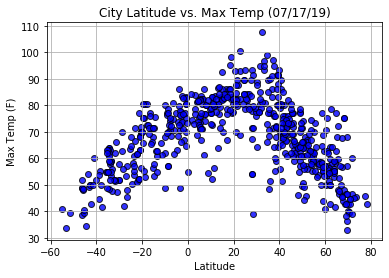

In [7]:
plt.scatter(lat, 
            max_t,
            edgecolor="black", c="b", marker="o", 
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temp (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("output_data/Fig1.png")


plt.show()

#### Latitude vs. Humidity Plot

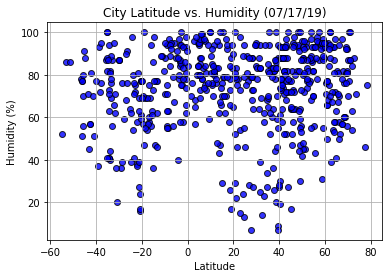

In [8]:
plt.scatter(lat, 
            humidity,
            edgecolor="black", c="b", marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()


#### Latitude vs. Cloudiness Plot

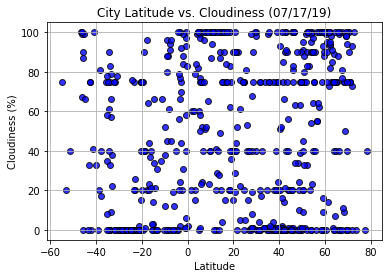

In [9]:
plt.scatter(lat, 
            cloudiness,
            edgecolor="black", c="b", marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

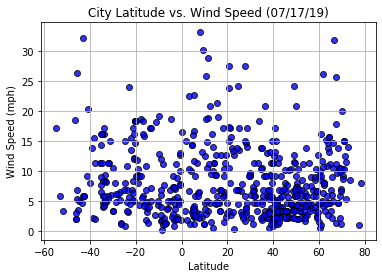

In [10]:
plt.scatter(lat, 
            wind_sp,
            edgecolor="black", c="b", marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("output_data/Fig4.png")
plt.show()